In [1]:
import matplotlib.pyplot as plt
import xgi

In [2]:
N = 20
ps = [0.1, 0.01]
H = xgi.random_hypergraph(N, ps, seed=1)

C:\Users\cyril\AppData\Roaming\Python\Python312\site-packages\xgi\generators\random.py:154: UserWarning: This method is much slower than fast_random_hypergraph
  warn("This method is much slower than fast_random_hypergraph")


In [18]:
print(type(H))

<class 'xgi.core.hypergraph.Hypergraph'>


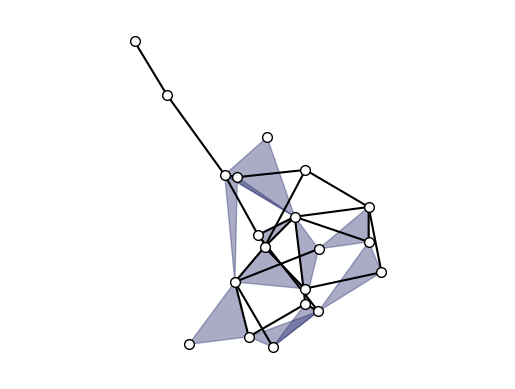

In [5]:
pos = xgi.barycenter_spring_layout(H, seed=1)
xgi.draw(H, pos=pos);

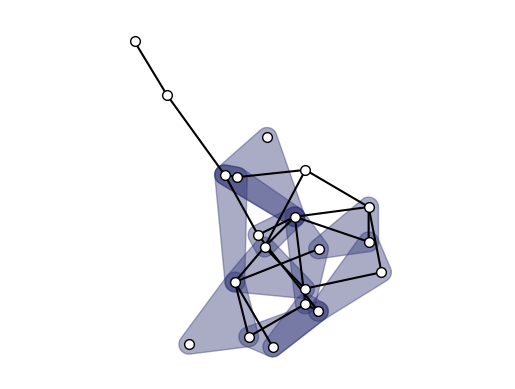

In [7]:
xgi.draw(H, pos=pos, hull=True);

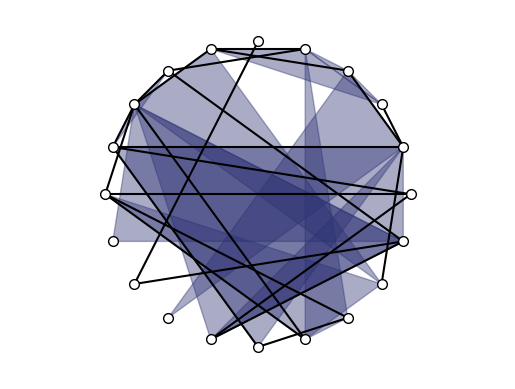

In [8]:
pos_circular = xgi.circular_layout(H)
xgi.draw(H, pos=pos_circular);

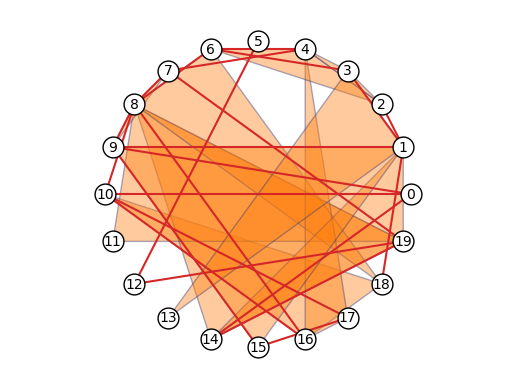

In [14]:
xgi.draw(H, node_labels=True, node_size=15, dyad_color="tab:red", edge_fc="tab:orange", pos=pos_circular);

Unnamed Hypergraph with 6 nodes and 26 hyperedges
[1, 2, 3, 4, 5, 6]
[{1}, {2}, {3}, {4}, {5}, {6}, {1, 2}, {1, 3}, {1, 4}, {1, 5}, {1, 6}, {2, 3}, {2, 4}, {2, 5}, {2, 6}, {3, 4}, {3, 5}, {3, 6}, {4, 5}, {4, 6}, {5, 6}, {1, 2, 3}, {1, 2, 4}, {1, 2, 5}, {1, 2, 6}, {1, 2, 3, 4, 5, 6}]


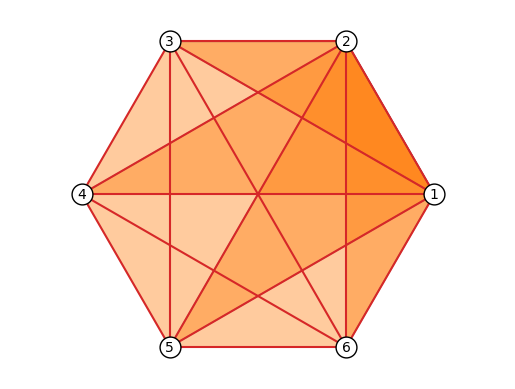

In [27]:
import xgi

# Your dictionary
data = {
    (1,): 3.856585039177835,
    (2,): 3.2714672640212337,
    (3,): 3.699619612467002,
    (4,): 3.8063449444070105,
    (5,): 3.0160533304484938,
    (6,): 3.4134795282777524,
    (1, 2): 2.3317515250077934,
    (1, 3): 2.972292748548143,
    (1, 4): 2.3692086627412756,
    (1, 5): 1.4967250906746017,
    (1, 6): 2.514824361054332,
    (2, 3): 2.051832872986491,
    (2, 4): 1.8101116544167457,
    (2, 5): 1.1498181602161148,
    (2, 6): 2.3198361407465065,
    (3, 4): 2.2324549259932063,
    (3, 5): 1.297135160164883,
    (3, 6): 2.1307817599613488,
    (4, 5): 1.5928663876536913,
    (4, 6): 2.1271135470047016,
    (5, 6): 1.2438238658469425,
    (1, 2, 3): 1.9923385016914175,
    (1, 2, 4): 1.6301964162538063,
    (1, 2, 5): 0.7238779199553349,
    (1, 2, 6): 2.101659947882962,
    (1, 2, 3, 4, 5, 6): 0.5342299868262925
}

# Create an empty hypergraph
H = xgi.Hypergraph()

# Add hyperedges with weights
for edge, weight in data.items():
    H.add_edge(edge, weight=weight)

# Print to verify
print(H)
print(H.nodes)
print(H.edges.members())

# Visualize the hypergraph
pos_circular = xgi.circular_layout(H)
xgi.draw(H, node_labels=True, node_size=15, dyad_color="tab:red", edge_fc="tab:orange", pos=pos_circular);

C:\Users\cyril\AppData\Local\Temp\ipykernel_18908\2285030730.py:49: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


ValueError: The input color argument must be a single color or its length must match the number of plotted elements (5).

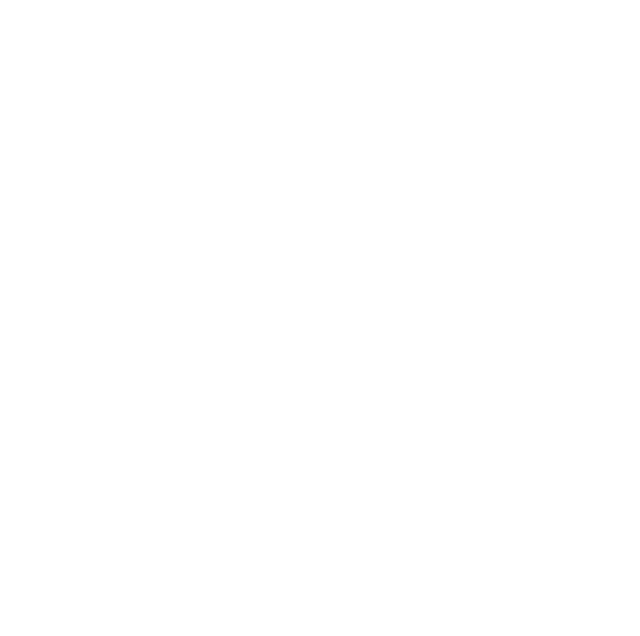

In [29]:
import xgi
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.cm as cm

# Your dictionary
data = {
    (1,): 3.856585039177835,
    (2,): 3.2714672640212337,
    (3,): 3.699619612467002,
    (4,): 3.8063449444070105,
    (5,): 3.0160533304484938,
    (6,): 3.4134795282777524,
    (1, 2): 2.3317515250077934,
    (1, 3): 2.972292748548143,
    (1, 4): 2.3692086627412756,
    (1, 5): 1.4967250906746017,
    (1, 6): 2.514824361054332,
    (2, 3): 2.051832872986491,
    (2, 4): 1.8101116544167457,
    (2, 5): 1.1498181602161148,
    (2, 6): 2.3198361407465065,
    (3, 4): 2.2324549259932063,
    (3, 5): 1.297135160164883,
    (3, 6): 2.1307817599613488,
    (4, 5): 1.5928663876536913,
    (4, 6): 2.1271135470047016,
    (5, 6): 1.2438238658469425,
    (1, 2, 3): 1.9923385016914175,
    (1, 2, 4): 1.6301964162538063,
    (1, 2, 5): 0.7238779199553349,
    (1, 2, 6): 2.101659947882962,
    (1, 2, 3, 4, 5, 6): 0.5342299868262925
}

# Create an empty hypergraph
H = xgi.Hypergraph()

# Add hyperedges with weights
for edge, weight in data.items():
    H.add_edge(edge, weight=weight)

# Extract weights and normalize them for the colormap
weights = np.array([H.edges[edge]["weight"] for edge in H.edges])
min_w, max_w = weights.min(), weights.max()
normalized_weights = (weights - min_w) / (max_w - min_w)  # Scale between 0 and 1

# Get viridis colors for each edge
cmap = cm.get_cmap("viridis")
edge_colors = [cmap(w) for w in normalized_weights]

# Visualization
pos_circular = xgi.circular_layout(H)
fig, ax = plt.subplots(figsize=(8, 8))

xgi.draw(
    H,
    node_labels=True,
    node_size=15,
    edge_fc_cmap="viridis",  # Use colormap directly
    edge_fc=weights,  # Assign raw weights (XGI will map them to colors)
    pos=pos_circular,
    ax=ax
)

plt.show()
